# Into the deep sense of what character feels

## Juyeon Lee
August 19, 2019

Introduction to Computational Literary Analysis

UC-Berkeley, Summer 2019

Instructor: Jonathan Reeve

# My corpus and hypothesis

### My corpus: Novels with female protagonists

 I am working on the corpus consist of novels that have a female protagonist. For example, Alice's Adventures in Wonderland, The Wizard of Oz, Gone with the wind, Little Women, Daddy Long Legs, and Secret Garden. Each novel has a strong female character and it shows the character’s development throughout the text. I collected those novels considering the written dates and the gender of the author. The reason why I chose the novels with the female protagonist is that I wanted to look at if there is any difference or characteristics in the way of describing females by the time and author. For example, my initial hypothesis is that female characters might be described more passive if written by male authors than female authors in given time period, and if written more than about 30 years earlier. 
 
 The reason I had this hypothesis is because while reading those texts before, I thought Alice and Dorothy, which is the protagonist in “Alice’s Adventures in Wonderland” and “The Wizard of Oz” respectively, are more passive and submissive towards given circumstance, giving me the impression that they simply follow or do whatever suggested to them rather than changing or challenging the situation. Also, the situation given to them is also quite absurd and not logical world where imaginative creatures and magic happens, which gives the impression of uncontrollable world especially by a little girl. For instance, when Alice found the bottle which had the label saying “drink me” on the table, she drank it without much doubt. In this description, she seems not having much choice nor did not come up with other options such as not drinking it. Likewise, Alice is described generally as nice tempered little girl and submissive to whatever happens to her. 
 
 On the other hand, Scarlett, Jo, Jerusha, and Mary seems to have more strong spirit and explicit expression of emotion. For example, Scarlett once made her dress using the curtain fabric, when she could not afford buying new clothes but she wanted new one for the purpose of hiding her poverty and difficulty in managing her house and family. In this scene, I can see she reacts to the given circumstance with her own creativity and she shows strong ego in this tough situation. Likewise, Mary got trouble with her family in that her parents are no longer able to take care of her so she has to move to her uncle’s home. She is described having very disheartened and angry one especially at the beginning of the story, but her emotions and thoughts are gradually developed as she dealt with the relationship with other characters. I would say this way of narrative is more focused on the character’s development and change, rather than focusing on describing external appearance of emotions or speech as in “Alice’s Adventures in Wonderland” or “The Wizard of Oz”, and I thought it might be derived from the gender or the author and the time period those were written. 


In [2]:
import sklearn # scikit-learn
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
import pandas as pd
%matplotlib inline
import random
import collections
from matplotlib import pyplot as plt

from nltk.corpus import sentiwordnet as sw
import requests
import spacy
from textblob import TextBlob

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
conda install -c conda-forge textblob

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
nltk.download('sentiwordnet')


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Juyeon\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [8]:
myDict = {}
myDict['Alice\'s Adventure'] = open('alice.txt', encoding='utf-8').read()
myDict['The Wizard of Oz'] = open('oz.txt', encoding='utf-8').read()
myDict['Gone with the Wind'] = open('wind.txt', encoding='utf-8').read()
myDict['Little Women'] = open('Little Women.txt', encoding = 'utf-8').read()
myDict['Daddy Long Legs'] = open('daddy.txt', encoding = 'utf-8').read()
myDict['Secret Garden'] = open('secret.txt', encoding = 'utf-8').read()

#trimming and making it lower case.
for item in myDict:
    myDict[item] = myDict[item].lower()
    if item != 'Gone with the Wind':
        trim = myDict[item].split('***')
        myDict[item] = trim[2]
myDict['Gone with the Wind'] = myDict['Gone with the Wind'][1093:]


# Main arguments and analysis methods
 I specified the argument and the methods to verify my hypothesis and it consists of three different parts. 

## 1. What is the mostly used verbs with each protagonist? 
#### Is there anything to note between each novel or character especially in terms of the gender of author, age of protagonist or the time period that it was written?

I looked up the verbs that appeared in the same sentence where each protagonist’s name also appeared. I took out common verbs such as ‘said’, ‘thought’, ‘looked’, ‘was’ and etc., by creating a list of common verbs. After taking out all of those verbs, the frequency of the repeatedly used verbs was reduced to below 100. 


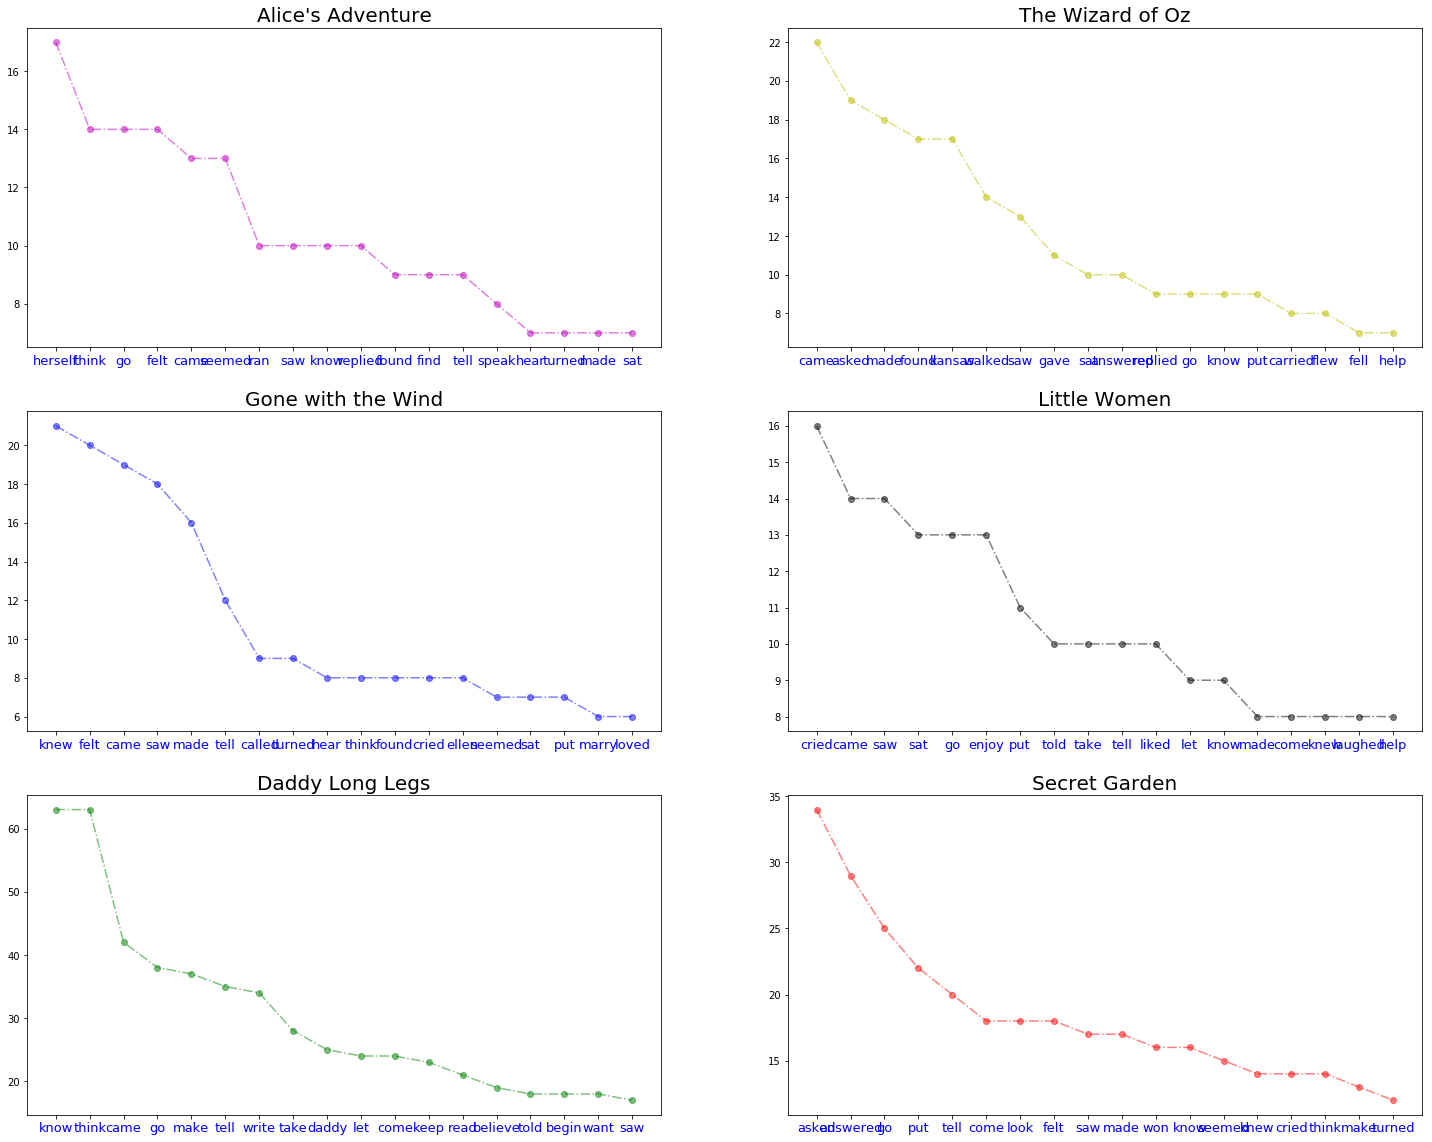

In [9]:
def charVerb2(text, name):
    """ This function looks for the verbs used in a same sentence where the character's name appeared. """
    
    allSent = nltk.sent_tokenize(text)
    sents = []
    for sent in allSent:
        if name in sent:
            sents.append(sent)
    
    verbs = []
    words = []
    
    words = nltk.word_tokenize(' '.join(sents))
    tags = nltk.pos_tag(words)
       
    # common verbs would not be countered.
    for i, pair in enumerate(tags): 
        word, pos = pair
        if (pos == 'VB' or pos == 'VBD'):
            if word not in ['have', 'get','took','said','thought', 'please','looked','was','were','be','do','did','had','began',
                            'say','s', 'i', '“', "”", 'scarlett','’','dorothy','jo','i','mary','alice', 'went','see','stood','got']:
                verbs.append(word)
             
    return (verbs)

chars_count = {}
nameList = ["alice", "dorothy", "scarlett", "jo", "i", "mary"]
chars = {}
saidPro={}

# get the most common 18 words out of each text

for (item, i) in zip(myDict, nameList):
    chars[item] = []
    chars_count[item] = {}
    chars[item] = charVerb2(myDict[item], i)
    chars_count[item]={item: collections.Counter(chars[item]).most_common(18)}
    name = {}
    values = {}

# creating plots

fig = plt.figure(figsize=(25,20))
for (item, i) in zip(myDict, range(1,7,1)):
    name[item] = []
    values[item] = []

    for element in chars_count[item]:

        for pairs in chars_count[item][element]:
            name[item].append(pairs[0])
            values[item].append(pairs[1])
    pick = ['c','m','y','b','k','g','r']
    ax = fig.add_subplot(3,2,i)
    ax.plot(name[item],values[item],'mo-.',alpha=0.5, c= pick[i])
    plt.xticks(fontsize = 13, color = 'b')
    plt.title(item, fontsize = 20)
    
      


The noticeable difference in adverbs used in description of each protagonist between each novel is that different from Alice’s Adventures in Wonderland and The Wizard of Oz, other four novels have more active verbs such as ‘enjoy’, ‘love’, ‘like’, ‘want’, ‘believe’ and  ‘won’. On the contrary, the former two literature mainly have rather common verbs which is more observant rather than explicitly and directly express the emotions and autonomous or unique behaviors of each figure, such as ‘went’, ‘go’, ‘came’, ‘replied’, ‘took’, ‘find’, and etc. These sets of frequent verbs aligns with my earlier impression and hypothesis about each book, in that Alice and Dorothy in Alice’s Adventures in Wonderland and The Wizard of Oz are both little girl and shows relatively passive way of reacting to given circumstances which is described as quite absurd and uncontrollable. They did not much choose based on their feeling, preference or what they believe compared to Scarlett, Jo, Jerusha, and Mary in Gone with the Wind, Little Women, Daddy Long Legs, and Secret Garden.

Specifically, I can tell some of uniqueness in each novel by these verbs, for example, in Daddy Long Legs, the protagonist Jerusha often paired with verbs such as ‘write’ and ‘read’, which is distinguishable from other novels in my corpus. The reason is that she talks a lot about literature and she pursue to be a writer in the future. So, the keenly related to what she wants and where she put her efforts appeared with verbs.

Also, Scarlett in Gone with the Wind distinguishably appears with the verb ‘marry’ six times. Since she struggles with love and romantic relationship with other characters such as Ashley and Rhett Butler. Also, the time period of this novel, marriage and the was still crucial matter in ladies’ life can be considered as well.


This function below looks for the quote of each protagonist. For example, whenever the sentence is followed by 'said-Alice', it adds the sentence into Quote list and return it.
Also, due to the malfunction of sent_tokenize, sometimes one single sentence is regarded as multiple independent sentence. I figured out it happens a lot when marks such as '!', '?' are in quoted sentence. Thus, I solved this problem with adding the previous sentence of the sentence which starts with "said Alice"-type of words.

In [11]:

def QuoteList(text, name):

    sentToken = nltk.sent_tokenize(text)
    verbList = []
    saidVerbs = ['said', 'asked', 'cried', 'inquired', 'shouted', 'pleaded', 'replied', 'thought', 'suggested', 'added', 'exclaimed', "laughed"
                'repeated''whispered', 'considered', 'advised', 'began', 'enquired', 'worried', 'longed', 'thanked', 'stopped', 'told', 'followed',
                 'recalled', 'called', 'responded']
            
    
    for item in saidVerbs:
        verbList.append(item + " " + name)
    
    Quote = []
    for i, sent in enumerate(sentToken):
        currentSent = list(sentToken)[i]
        prevSent = list(sentToken)[i-1]
        
        
        for item in verbList: 
            if item in sent: # one of words in saidVerbs: 
                if sent.startswith(str(saidVerbs)):
                    Quote.append(currentSent)
                else: 
                    Quote.append(prevSent)
    return Quote

In [12]:
name = ["alice", "dorothy", "scarlett", "jo", "i", "mary"]
quote = {}
for (item, i) in zip(myDict, range(len(myDict))):
    quote[item] = QuoteList((myDict[item]),name[i])
    


## 2. What is each character’s emotion throughout the novel? 

#### I created a function which looks up the list of words of emotion and calculate the proportion of words in each text. I made four lists of emotions, which consist of words related to ‘cry’, ‘laugh’, ‘fear’, and ‘anger’. 
 

In [17]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

def plotAcrossStories(wordList):
    counts = {}
    titles = myDict.keys()
    for title, story in zip(titles, myDict): 
        
        tokens = ' '.join(nltk.word_tokenize(myDict[story]))
        
        tokens = lemmatizer.lemmatize(tokens)
        
        counts[title] = {word: (tokens.count(word)/len(tokens)) for word in wordList}
       
    return counts

In [23]:
cry = ['tear', 'sorrowful','sad', 'lonely', 'helpless', 'hopeless', 'melancholy']
laugh = ['smile', 'laugh', 'glad','delight','pleased','happy', 'pleasant']
fear = ['worry', 'ashamed', 'concern','stress','afraid','fear', 'frightened']
anger = ['irritated','unpleased','angry','upset','resentment','contempt','rage']

#pd.DataFrame(plotAcrossStories(cry)).T.plot(kind='bar')

df = pd.DataFrame(plotAcrossStories(cry)).T
df['cry'] = df.sum(axis=1)/7

df2 = pd.DataFrame(plotAcrossStories(laugh)).T
df2['laugh'] = df2.sum(axis=1)/7

df3 = pd.DataFrame(plotAcrossStories(fear)).T
df3['fear'] = df3.sum(axis=1)/7

df4 = pd.DataFrame(plotAcrossStories(anger)).T
df4['anger'] = df4.sum(axis=1)/7

dfText = pd.DataFrame((df['cry'],df2['laugh'],df3['fear'],df4['anger'])).T



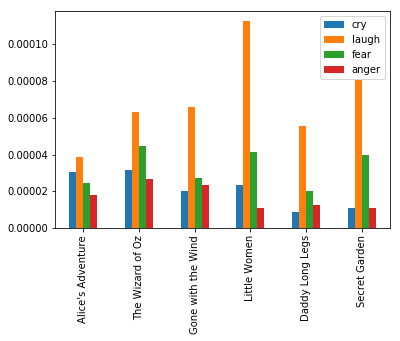

In [22]:
dfText.plot(kind='bar')

In the plot that shows the proportion of words in each group showed in the text, it is noticeable that Little Women has the highest number of laugh related words in the same sentence where Jo appeared. Also, for every protagonist, the emotion related with laugh is the most frequent one compared to other emotion. 

As the second most appeared emotion with each protagonist shows a little bit different result. For Alice, it is cry related emotion which includes tears, melancholy, and lonely. I did not include the word ‘cry’ itself, because most of the time in the text of my corpus, it was used as meaning of ‘yell’ or ‘scream’. We can see Alice laughs many times but also feel sad and depressed a lot. On the other hand, Dorothy fears more than being sad, but sad emotion follows fear emotion. The distinguishable points here is that Alice and Dorothy do not have much difference between the frequency of laugh emotion and other emotion than the other four protagonists. When we look at the third to the last bars in the plot, Scarlett, Jo, Jerusha, and Mary has more than two times taller bar of laugh emotion than any other emotion.

When we note that those verbs accompanied by these same four characters were more about themselves and more precisely related with their feeling and wishes, maybe it can be interpreted as they have more self-control and in emotion and less fear or sadness about the situation they face.

## 3. Sentiment Analysis
#### How do they develop throughout the storyline? Compare with each literature. 


In [13]:
Doc = {}
lemmaList = {}
# create Docs
for item in myDict:
    Doc[item] = nlp(myDict[item])
   

In [19]:
for item in myDict:
    lemmaList[item] = []
    for sent in Doc[item].sents: 
        sentLemmaList = []
        for w in sent: 
            if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
                sentLemmaList.append((w.lemma_, w.pos_))
        lemmaList[item].append(sentLemmaList)
#print(lemmaList)

In [20]:
sentScores = {}
for item in myDict:
    sentScores[item] = []
    
    scores = {}
    
    for sent in lemmaList[item]: 
        scores[item] = []
        for word, pos in sent: 
            #print(word, pos)
            synPos = pos.lower()[0]
            if synPos not in ['a', 'n', 'v']:
                continue
            synsets = list(sw.senti_synsets(word, synPos))
            #print(synsets)
            if (type(synsets) == list) and len(synsets)>0:
                #print('yay!')
                synset = synsets[0]
                score = synset.pos_score() - synset.neg_score()
                #print(score)
                scores[item].append(score)
        
        if len(scores[item])>0: 
            avgScores = sum(scores[item]) / len(scores[item])
            sentScores[item].append(avgScores)
    #print(sentScores[item])

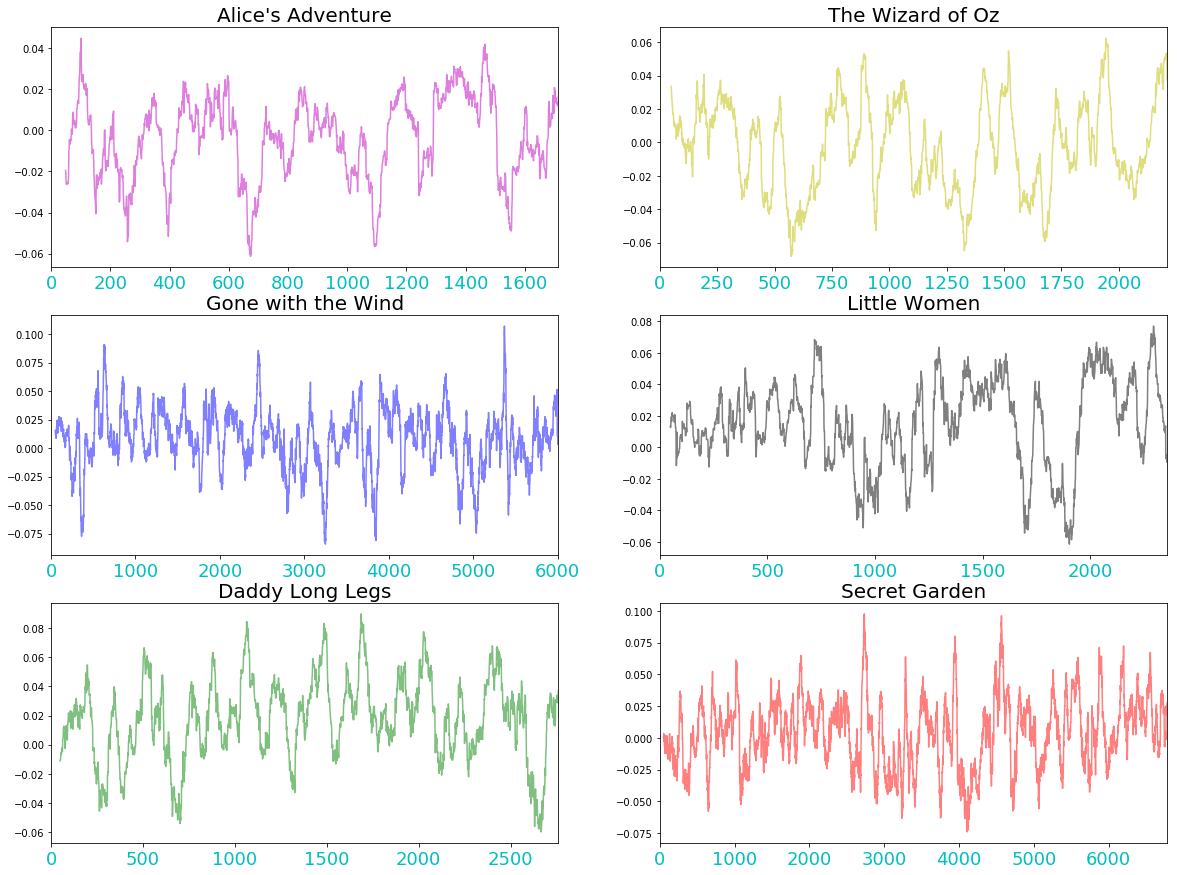

In [21]:
# compare the same amount of text : each part of proportionally beginning, middle and the end of the story.
fig=plt.figure(figsize =(20, 15))
for (item, i) in zip(sentScores, range(1,7,1)):
    sentimentPlt = pd.Series(sentScores[item]).rolling(50).mean()
    sentimentPlt = fig.add_subplot(3,2,i)
    pick = ['c','m','y','b','k','g','r']
    plt.xticks(fontsize = 18, color = 'c')
    plt.title(item, fontsize = 20)
    
    pd.Series(sentScores[item]).rolling(50).mean().plot(alpha = 0.5, c=pick[i])
    

All the novels in my corpus has higher positive sentiment at the end of the story compared to the beginning. Also, in the middle of the story each novel has multiple negative sentiment, which forms the development of each character. 